In [17]:
import numpy as np
import matplotlib.pyplot as plt
from qutip import Bloch, Qobj, Bloch3d

<center>
<h1> The Bloch Sphere</h1>
</center>

<centering>
<h1> The Bloch Sphere</h1>
</centering>

The Bloch sphere is a visual representation of the state of a two-level quantum system or a qubit. It is a unit sphere in 3-dimensional space, where each point on the surface of the sphere represents a unique pure state of the qubit. A qubit can be represented as a linear combination of its basis states. A qubit can be represented as a linear combination of its basis states, |0⟩ and |1⟩:

$$|\psi\rangle = \alpha|0\rangle + \beta|1\rangle$$

where $\alpha$ and $\beta$ are complex numbers and $|\alpha|^2 + |\beta|^2 = 1$. Then, a parametrization of the state of the qubit is defined by the mapping:

\begin{equation}
\alpha = \cos\left(\frac{\theta}{2}\right), \quad \beta = e^{i\phi}\sin\left(\frac{\theta}{2}\right),
\end{equation}

where $0 \leq \theta \leq \pi$ and $0 \leq \phi < 2\pi$. With this parameterization, the state of the qubit can be written as:

\begin{equation}
|\psi\rangle = \cos\left(\frac{\theta}{2}\right) |0\rangle + e^{i\phi}\sin\left(\frac{\theta}{2}\right) |1\rangle.
\end{equation}

Now we can represent the qubit state as a point on the Bloch sphere using Cartesian coordinates:

\begin{gather*}
x = \sin\theta\cos\phi, \\
y = \sin\theta\sin\phi, \\
z = \cos\theta.
\end{gather*}

This mapping allows us to visualize any qubit state as a point on the surface of a sphere with radius 1, centered at the origin.

### Lets code it up to see what it looks like!

In [48]:
def init_qubit_state(theta, phi):
    alpha = np.cos(theta / 2)
    beta = np.exp(1j * phi) * np.sin(theta / 2)
    return Qobj([[alpha], [beta]])

def pauli_x(): return Qobj([[0, 1], [1, 0]])

def pauli_y(): return Qobj([[0, -1j], [1j, 0]])

def pauli_z(): return Qobj([[1, 0], [0, -1]])

def phase_shift(phi): return Qobj([[1, 0], [0, np.exp(1j * phi)]])

def apply_gate(state, gate): return gate * state

def visualize_bloch_sphere(state, color="b"):
    b = Bloch()
    b.add_states(state)
    b.vector_color = ['r']
    b.point_color = [color]
    b.show()

Thus, we can represent the state of a qubit as a point on the surface of a sphere with radius 1, centered at the origin. For example, one would look:


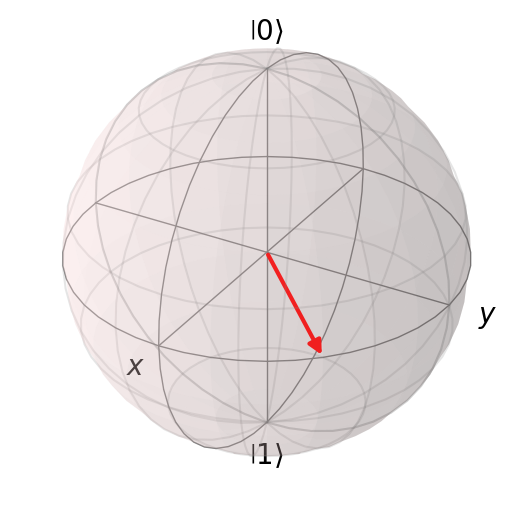

In [50]:
theta = np.pi / 2
phi = np.pi / 4
psi = init_qubit_state(theta, phi)
visualize_bloch_sphere(psi)

# Pauli matrices

It is possible to use a basis change to represent the state of a qubit in terms of the Pauli matrices. The Pauli matrices are a set of three 2 × 2 complex matrices that are Hermitian and unitary. They are defined as:

\begin{gather*}
\sigma_x = \begin{pmatrix} 0 & 1 \\ 1 & 0 \end{pmatrix}, \\

\sigma_y = \begin{pmatrix} 0 & -i \\ i & 0 \end{pmatrix}, \\
\sigma_z = \begin{pmatrix} 1 & 0 \\ 0 & -1 \end{pmatrix}.\\
\end{gather*}



Then the expectation value of the Pauli matrices can be used to determine the state of the qubit. Then, we can write the density matrix of the qubit as:

\begin{equation}
\rho = \frac{1}{2} \left( I + \vec{r} \cdot \vec{\sigma} \right),
\end{equation}

where $r$ is a vector indicating each one of the components of the expectation values Pauli matrices:

\begin{equation}
\vec{r} = \begin{pmatrix} \braket{\sigma_x}\\ \braket{\sigma_y} \\ \braket{\sigma_z} \end{pmatrix} = \begin{pmatrix} \sin{\theta}\cos{\phi} \\ \sin{\theta}\sin{\phi} \\ \cos{\theta} \end{pmatrix}.
\end{equation}



This is very interesting because each one of the pauli matrices acts differently on the qubit. For example, the $\sigma_z$ matrix acts as the identity on the $|0\rangle$ state and as a negative identity on the $|1\rangle$ state. This means that if we measure the expectation value of $\sigma_z$ on a qubit in the $|0\rangle$ state, we will get 1, and if we measure it on a qubit in the $|1\rangle$ state, we will get -1. We can in fact use this to get an intuition of what the pauli matrices do to the qubit using our previos code:

### $\sigma_x$ matrix

\begin{gather*}
\hat\sigma_x\ket{\psi} = (\ket{0}\bra{1}+\ket{1}\bra{0}) \ket{\psi} \\
= (\ket{0}\bra{1}+\ket{1}\bra{0}) \left(\cos (\frac{\theta}{2})\ket{0}+e^{i\varphi}\sin(\frac{\theta}{2})\ket{1} \right)\\
=\cos (\frac{\theta}{2}) \ket{1} \braket{0|0} + e^{i\varphi}\sin(\frac{\theta}{2})\ket{0} \braket{1|1}\\
=e^{i\varphi} \left[\sin(\frac{\theta}{2})\ket{0} + e^{-i\varphi}\cos (\frac{\theta}{2}) \ket{1}\right]
\end{gather*}


We'll now use the identities: $\sin{(\phi)} = \cos{(\pi/2 - \phi)}$ and $\cos{(\phi)} = \sin{(\pi/2 - \phi)}$
\begin{gather*}
    \hat\sigma_x\ket{\psi}
=  e^{i\varphi}\left[\cos(\tfrac{\pi-\theta}{2})]\ket{0} +e^{-i\varphi}\sin(\tfrac{\pi-\theta}{2})\ket{1}\right]
\end{gather*}
    Therefore we showed that the overall effect of the $\sigma_x$ is to rotate the basis by a factor of $\pi/2$. 

In the code:


Initial state:  Quantum object: dims = [[2], [1]], shape = (2, 1), type = ket
Qobj data =
[[0.70710678+0.j ]
 [0.5       +0.5j]]


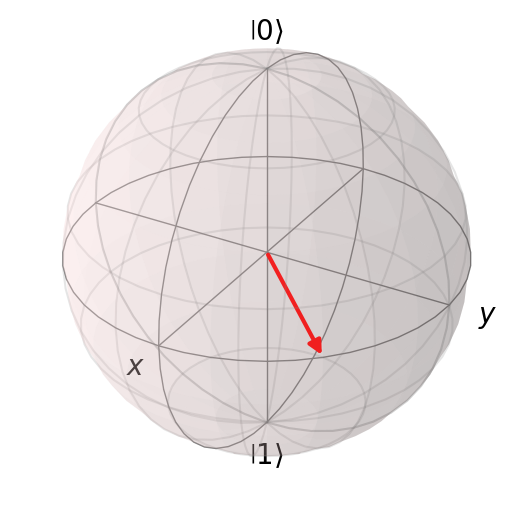

After Pauli X:  Quantum object: dims = [[2], [1]], shape = (2, 1), type = ket
Qobj data =
[[0.5       +0.5j]
 [0.70710678+0.j ]]


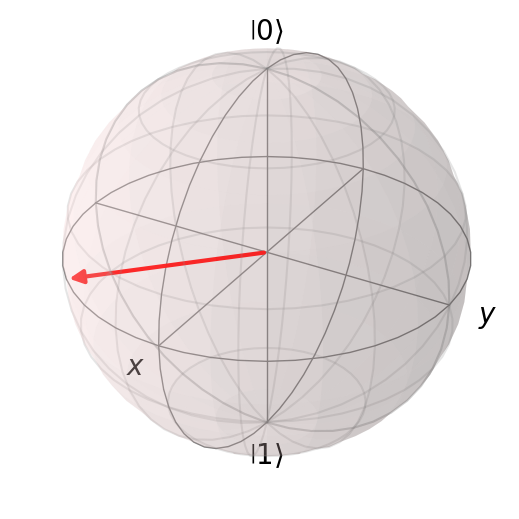

In [53]:
print("Initial state: ", psi)
psi = init_qubit_state(theta, phi)
visualize_bloch_sphere(psi, )
print("After Pauli X: ", apply_gate(psi, pauli_x()))
psi_x = apply_gate(psi, pauli_x())
visualize_bloch_sphere(psi_x, "g" )

### $\sigma_y$ matrix


$\hat\sigma_y\ket{\psi}= -ie^{i\varphi}\left[\cos(\tfrac{\pi-\theta}{2})\ket{0} +e^{-i(\varphi+\pi)}\sin(\tfrac{\pi-\theta}{2})\ket{1}\right]$


\begin{gather*}
    \sigma_y = i\ket{1}\bra{0} -i\ket{0}\bra{1}\\
    \hat\sigma_y\ket{\psi}=(i\ket{1}\bra{0} -i\ket{0}\bra{1})\left[\cos(\tfrac{\theta}{2})\ket{0} +e^{i(\varphi)}\sin(\tfrac{\theta}{2})\ket{1}\right]\\
    =(i\ket{1}\bra{0})\left[\cos(\tfrac{\theta}{2})\ket{0} +e^{i(\varphi)}\sin(\tfrac{\theta}{2})\ket{1}\right] -(i\ket{0}\bra{1})\left[\cos(\tfrac{\theta}{2})\ket{0} -e^{i(\varphi)}\sin(\tfrac{\theta}{2})\ket{1}\right]\\
    =i\left\{\left[\cos(\tfrac{\theta}{2})\ket{1}\braket{0|0}-e^{i(\varphi)}\sin(\tfrac{\theta}{2})\ket{1}\cancel{\braket{0|1}}\right] \\+ \left[\cos(\tfrac{\theta}{2})\ket{0}\cancel{\braket{1|0}} -e^{i(\varphi)}\sin(\tfrac{\theta}{2})\ket{0}\braket{1|1}\right]
    \right\}\\
    =i\left\{\cos(\tfrac{\theta}{2})\ket{1} -e^{i(\varphi)}\sin(\tfrac{\theta}{2})\ket{0}\right\}\\
    = ie^{i\varphi}\left\{e^{-i\varphi}\cos(\tfrac{\theta}{2})\ket{1} -\sin(\tfrac{\theta}{2})\ket{0}\right\}\\
    = -ie^{i\varphi}\left\{-e^{-i\varphi}\sin(\tfrac{\pi-\theta}{2})\ket{1} +\cos(\tfrac{\pi\theta}{2})\ket{0}\right\}\\
    = -ie^{i\varphi}\left[\cos(\tfrac{\pi-\theta}{2})\ket{0} - e^{-i\varphi}\sin(\tfrac{\pi-\theta}{2})\ket{1}\right]
\end{gather*}


Finally, we note that $ e^{-i\varphi} =  -e^{-i(\varphi+\pi)}$. Therefore,
 $$\hat\sigma_y\ket{\psi}= -ie^{i\varphi}\left[\cos(\tfrac{\pi-\theta}{2})\ket{0} +e^{-i(\varphi+\pi)}\sin(\tfrac{\pi-\theta}{2})\ket{1}\right]$$
And so, the $\sigma_y$ operator also rotates the basis in $\Delta \theta  = pi/2$ but also creates a phase shift of $\Delta \phi = \pi$.

Initial state:  Quantum object: dims = [[2], [1]], shape = (2, 1), type = ket
Qobj data =
[[0.70710678+0.j ]
 [0.5       +0.5j]]


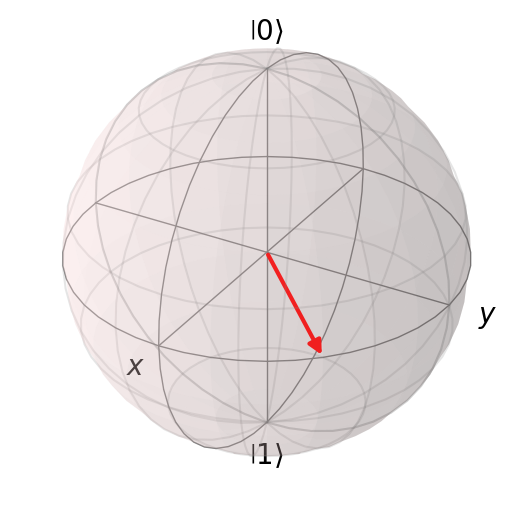

After Pauli Y:  Quantum object: dims = [[2], [1]], shape = (2, 1), type = ket
Qobj data =
[[0.5-0.5j       ]
 [0. +0.70710678j]]


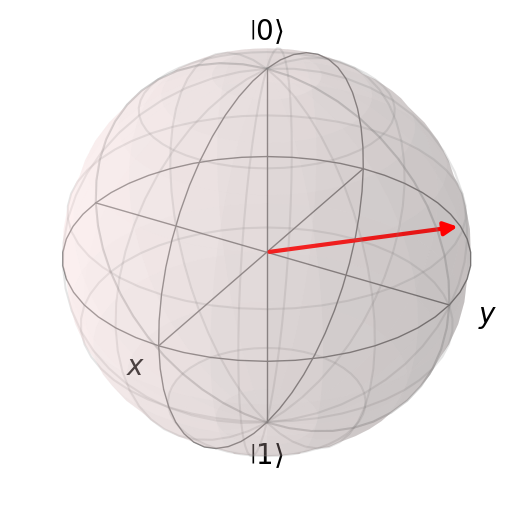

In [54]:
print("Initial state: ", psi)
psi = init_qubit_state(theta, phi)
visualize_bloch_sphere(psi, )
print("After Pauli Y: ", apply_gate(psi, pauli_y()))
psi_y = apply_gate(psi, pauli_y())
visualize_bloch_sphere(psi_y, "g" )

### $\sigma_z$ matrix

$\hat\sigma_z\ket{\psi}= \cos(\tfrac{\theta}{2})\ket{0} +e^{i(\varphi+\pi)}\sin(\tfrac{\theta}{2})\ket{1}$

\begin{gather*}
    \sigma_z = (\ket{0}\bra{0} - \ket{1}\bra{1})\\
     \sigma_z \ket \psi = (\ket{0}\bra{0} - \ket{1}\bra{1})\left(\cos (\frac{\theta}{2})\ket{0}+e^{i\varphi}\sin(\frac{\theta}{2})\ket{1} \right)\\
    = \left(\cos{(\theta/2)}\ket{0}\braket{0|0}+e^{i\varphi}\sin{(\theta/2)}\ket{0}\cancel{\braket{0|1}} \right) - \left(\cos (\theta/2)\ket{1}\cancel{\braket{1|0}}+e^{i\varphi}\sin{(\theta/2)}\ket{1}\braket{1|1} \right)\\
    =\cos{(\theta/2)}\ket{0} - e^{i\varphi}\sin{(\theta/2)}\ket{1}\\
\end{gather*}

Again we only take $ e^{-i\varphi} =  -e^{-i(\varphi+\pi)}$ to get:
$$\hat\sigma_z\ket{\psi}= \cos(\tfrac{\theta}{2})\ket{0} +e^{i(\varphi+\pi)}\sin(\tfrac{\theta}{2})\ket{1}$$

Therefore, we are seeing that in the $\ket{0}$, $\ket{1}$ basis, our coefficients are invariant to applying $\sigma_z$ excepting for a basis shift of $\Delta \phi = \pi$.

Initial state:  Quantum object: dims = [[2], [1]], shape = (2, 1), type = ket
Qobj data =
[[0.70710678+0.j ]
 [0.5       +0.5j]]


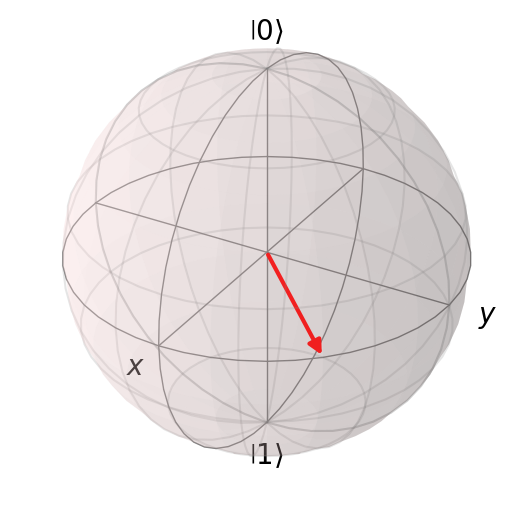

After Pauli Z:  Quantum object: dims = [[2], [1]], shape = (2, 1), type = ket
Qobj data =
[[ 0.70710678+0.j ]
 [-0.5       -0.5j]]


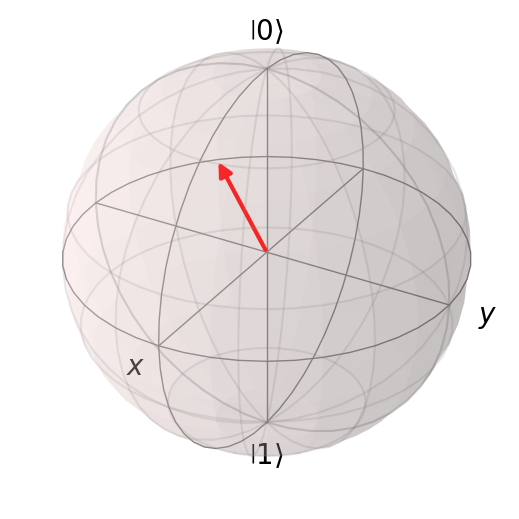

In [55]:
print("Initial state: ", psi)
psi = init_qubit_state(theta, phi)
visualize_bloch_sphere(psi, )
print("After Pauli Z: ", apply_gate(psi, pauli_z()))
psi_z = apply_gate(psi, pauli_z())
visualize_bloch_sphere(psi_z, "g" )